In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fire_data = pd.read_csv("E:\hz_fire_cnt_3h.csv")
fire_data.shape

(2951, 32)

In [3]:
fire_data

,hz_time,T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Td,RRR,tR,E,Tg,E',sss,time_1,city_code_x,city_code_y
0,2021-03-20 05:00:00,12.0,756.5,760.4,0.0,95.0,从西北方吹来的风,2.0,NaN,6.0,...,11.2,19,12.0,NaN,NaN,NaN,NaN,2021-03-20 05:00:00,1,4
1,2021-03-20 08:00:00,12.1,758.2,762.2,1.7,87.0,从西北偏北方向吹来的风,4.0,NaN,8.0,...,10.0,19,12.0,NaN,NaN,NaN,NaN,2021-03-20 08:00:00,1,3
2,2021-03-20 11:00:00,12.1,758.8,762.8,0.6,83.0,从西北方吹来的风,4.0,NaN,9.0,...,9.3,19,12.0,NaN,NaN,NaN,NaN,2021-03-20 11:00:00,0,1
3,2021-03-20 14:00:00,11.7,757.9,761.9,-0.9,78.0,从西北偏北方向吹来的风,4.0,NaN,9.0,...,8.0,0.6,12.0,NaN,NaN,NaN,NaN,2021-03-20 14:00:00,0,0
4,2021-03-20 17:00:00,10.8,759.0,763.0,1.1,79.0,从西北偏北方向吹来的风,4.0,NaN,10.0,...,7.3,无降水,12.0,NaN,NaN,NaN,NaN,2021-03-20 17:00:00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2946,2022-03-26 05:00:00,14.6,755.3,759.1,2.4,74.0,从西北方吹来的风,4.0,NaN,11.0,...,10.0,9,12.0,NaN,NaN,NaN,NaN,2022-03-26 05:00:00,0,2
2947,2022-03-26 08:00:00,14.6,758.1,762.0,2.8,71.0,从西北偏北方向吹来的风,4.0,NaN,11.0,...,9.4,5,12.0,NaN,NaN,NaN,NaN,2022-03-26 08:00:00,2,4
2948,2022-03-26 11:00:00,15.6,758.5,762.4,0.4,63.0,从西北方吹来的风,5.0,NaN,11.0,...,8.6,0.6,12.0,NaN,NaN,NaN,NaN,2022-03-26 11:00:00,2,4
2949,2022-03-26 14:00:00,16.2,757.9,761.8,-0.6,62.0,从西北偏西方向吹来的风,2.0,NaN,11.0,...,8.9,0.3,12.0,NaN,NaN,NaN,NaN,2022-03-26 14:00:00,4,4


In [4]:
fire_data.loc[(fire_data["city_code_y"] == 0), "y_manual"] = 1
fire_data.loc[(fire_data["city_code_y"] >= 1) & (fire_data["city_code_y"] <= 3), "y_manual"] = 2
fire_data.loc[(fire_data["city_code_y"] >= 4) & (fire_data["city_code_y"] <= 8), "y_manual"] = 3
fire_data.loc[(fire_data["city_code_y"] >= 9) & (fire_data["city_code_y"] <= 19), "y_manual"] = 4
fire_data.loc[(fire_data["city_code_y"] >= 20), "y_manual"] = 5
fire_data

,hz_time,T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,RRR,tR,E,Tg,E',sss,time_1,city_code_x,city_code_y,y_manual
0,2021-03-20 05:00:00,12.0,756.5,760.4,0.0,95.0,从西北方吹来的风,2.0,NaN,6.0,...,19,12.0,NaN,NaN,NaN,NaN,2021-03-20 05:00:00,1,4,3.0
1,2021-03-20 08:00:00,12.1,758.2,762.2,1.7,87.0,从西北偏北方向吹来的风,4.0,NaN,8.0,...,19,12.0,NaN,NaN,NaN,NaN,2021-03-20 08:00:00,1,3,2.0
2,2021-03-20 11:00:00,12.1,758.8,762.8,0.6,83.0,从西北方吹来的风,4.0,NaN,9.0,...,19,12.0,NaN,NaN,NaN,NaN,2021-03-20 11:00:00,0,1,2.0
3,2021-03-20 14:00:00,11.7,757.9,761.9,-0.9,78.0,从西北偏北方向吹来的风,4.0,NaN,9.0,...,0.6,12.0,NaN,NaN,NaN,NaN,2021-03-20 14:00:00,0,0,1.0
4,2021-03-20 17:00:00,10.8,759.0,763.0,1.1,79.0,从西北偏北方向吹来的风,4.0,NaN,10.0,...,无降水,12.0,NaN,NaN,NaN,NaN,2021-03-20 17:00:00,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2946,2022-03-26 05:00:00,14.6,755.3,759.1,2.4,74.0,从西北方吹来的风,4.0,NaN,11.0,...,9,12.0,NaN,NaN,NaN,NaN,2022-03-26 05:00:00,0,2,2.0
2947,2022-03-26 08:00:00,14.6,758.1,762.0,2.8,71.0,从西北偏北方向吹来的风,4.0,NaN,11.0,...,5,12.0,NaN,NaN,NaN,NaN,2022-03-26 08:00:00,2,4,3.0
2948,2022-03-26 11:00:00,15.6,758.5,762.4,0.4,63.0,从西北方吹来的风,5.0,NaN,11.0,...,0.6,12.0,NaN,NaN,NaN,NaN,2022-03-26 11:00:00,2,4,3.0
2949,2022-03-26 14:00:00,16.2,757.9,761.8,-0.6,62.0,从西北偏西方向吹来的风,2.0,NaN,11.0,...,0.3,12.0,NaN,NaN,NaN,NaN,2022-03-26 14:00:00,4,4,3.0


In [5]:
fire_data.loc[(fire_data["city_code_y"] >= 0) & (fire_data["city_code_y"] <= 6), "y_kmeans"] = 1
fire_data.loc[(fire_data["city_code_y"] >= 7) & (fire_data["city_code_y"] <= 14), "y_kmeans"] = 2
fire_data.loc[(fire_data["city_code_y"] >= 15) & (fire_data["city_code_y"] <= 30), "y_kmeans"] = 3
fire_data.loc[(fire_data["city_code_y"] >= 31) & (fire_data["city_code_y"] <= 62), "y_kmeans"] = 4
fire_data.loc[(fire_data["city_code_y"] >= 63), "y_kmeans"] = 5
fire_data

,hz_time,T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,tR,E,Tg,E',sss,time_1,city_code_x,city_code_y,y_manual,y_kmeans
0,2021-03-20 05:00:00,12.0,756.5,760.4,0.0,95.0,从西北方吹来的风,2.0,NaN,6.0,...,12.0,NaN,NaN,NaN,NaN,2021-03-20 05:00:00,1,4,3.0,1.0
1,2021-03-20 08:00:00,12.1,758.2,762.2,1.7,87.0,从西北偏北方向吹来的风,4.0,NaN,8.0,...,12.0,NaN,NaN,NaN,NaN,2021-03-20 08:00:00,1,3,2.0,1.0
2,2021-03-20 11:00:00,12.1,758.8,762.8,0.6,83.0,从西北方吹来的风,4.0,NaN,9.0,...,12.0,NaN,NaN,NaN,NaN,2021-03-20 11:00:00,0,1,2.0,1.0
3,2021-03-20 14:00:00,11.7,757.9,761.9,-0.9,78.0,从西北偏北方向吹来的风,4.0,NaN,9.0,...,12.0,NaN,NaN,NaN,NaN,2021-03-20 14:00:00,0,0,1.0,1.0
4,2021-03-20 17:00:00,10.8,759.0,763.0,1.1,79.0,从西北偏北方向吹来的风,4.0,NaN,10.0,...,12.0,NaN,NaN,NaN,NaN,2021-03-20 17:00:00,0,0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2946,2022-03-26 05:00:00,14.6,755.3,759.1,2.4,74.0,从西北方吹来的风,4.0,NaN,11.0,...,12.0,NaN,NaN,NaN,NaN,2022-03-26 05:00:00,0,2,2.0,1.0
2947,2022-03-26 08:00:00,14.6,758.1,762.0,2.8,71.0,从西北偏北方向吹来的风,4.0,NaN,11.0,...,12.0,NaN,NaN,NaN,NaN,2022-03-26 08:00:00,2,4,3.0,1.0
2948,2022-03-26 11:00:00,15.6,758.5,762.4,0.4,63.0,从西北方吹来的风,5.0,NaN,11.0,...,12.0,NaN,NaN,NaN,NaN,2022-03-26 11:00:00,2,4,3.0,1.0
2949,2022-03-26 14:00:00,16.2,757.9,761.8,-0.6,62.0,从西北偏西方向吹来的风,2.0,NaN,11.0,...,12.0,NaN,NaN,NaN,NaN,2022-03-26 14:00:00,4,4,3.0,1.0


In [6]:
target_cols = ["T", "Po", "P", "Pa", "U", "Td", "Tn", "Tx", "y_manual", "y_kmeans"]
x_cols = ["T", "Po", "P", "Pa", "U", "Td", "Tn", "Tx"]

In [7]:
whole_df = fire_data[target_cols]
whole_df

,T,Po,P,Pa,U,Td,Tn,Tx,y_manual,y_kmeans
0,12.0,756.5,760.4,0.0,95.0,11.2,11.0,13.0,3.0,1.0
1,12.1,758.2,762.2,1.7,87.0,10.0,11.2,13.0,2.0,1.0
2,12.1,758.8,762.8,0.6,83.0,9.3,11.3,13.0,2.0,1.0
3,11.7,757.9,761.9,-0.9,78.0,8.0,11.5,13.0,1.0,1.0
4,10.8,759.0,763.0,1.1,79.0,7.3,10.8,12.8,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
2946,14.6,755.3,759.1,2.4,74.0,10.0,14.6,22.3,2.0,1.0
2947,14.6,758.1,762.0,2.8,71.0,9.4,14.0,22.3,3.0,1.0
2948,15.6,758.5,762.4,0.4,63.0,8.6,14.0,NaN,3.0,1.0
2949,16.2,757.9,761.8,-0.6,62.0,8.9,14.0,NaN,3.0,1.0


In [8]:
whole_df.isna().any()

T           False
Po          False
P           False
Pa           True
U           False
Td          False
Tn           True
Tx           True
y_manual    False
y_kmeans    False
dtype: bool

In [9]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values = np.nan, strategy = "mean")
imp_mean.fit(whole_df)
whole_imp_np = imp_mean.transform(whole_df)   # ndarray
whole_imp_np

array([[ 12.        , 756.5       , 760.4       , ...,  13.        ,
          3.        ,   1.        ],
       [ 12.1       , 758.2       , 762.2       , ...,  13.        ,
          2.        ,   1.        ],
       [ 12.1       , 758.8       , 762.8       , ...,  13.        ,
          2.        ,   1.        ],
       ...,
       [ 15.6       , 758.5       , 762.4       , ...,  22.95314501,
          3.        ,   1.        ],
       [ 16.2       , 757.9       , 761.8       , ...,  22.95314501,
          3.        ,   1.        ],
       [ 16.4       , 758.        , 761.9       , ...,  22.95314501,
          3.        ,   1.        ]])

In [11]:
whole_imp_df = pd.DataFrame(whole_imp_np, columns = target_cols)
whole_imp_df

,T,Po,P,Pa,U,Td,Tn,Tx,y_manual,y_kmeans
0,12.0,756.5,760.4,0.0,95.0,11.2,11.0,13.000000,3.0,1.0
1,12.1,758.2,762.2,1.7,87.0,10.0,11.2,13.000000,2.0,1.0
2,12.1,758.8,762.8,0.6,83.0,9.3,11.3,13.000000,2.0,1.0
3,11.7,757.9,761.9,-0.9,78.0,8.0,11.5,13.000000,1.0,1.0
4,10.8,759.0,763.0,1.1,79.0,7.3,10.8,12.800000,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
2946,14.6,755.3,759.1,2.4,74.0,10.0,14.6,22.300000,2.0,1.0
2947,14.6,758.1,762.0,2.8,71.0,9.4,14.0,22.300000,3.0,1.0
2948,15.6,758.5,762.4,0.4,63.0,8.6,14.0,22.953145,3.0,1.0
2949,16.2,757.9,761.8,-0.6,62.0,8.9,14.0,22.953145,3.0,1.0


In [12]:
whole_imp_df.isna().any()

T           False
Po          False
P           False
Pa          False
U           False
Td          False
Tn          False
Tx          False
y_manual    False
y_kmeans    False
dtype: bool

In [13]:
whole_corr = whole_imp_df.corr()
whole_corr

,T,Po,P,Pa,U,Td,Tn,Tx,y_manual,y_kmeans
T,1.000000,-0.840536,-0.844475,-0.094522,-0.117472,0.877216,0.924531,0.897902,-0.056496,-0.079742
Po,-0.840536,1.000000,0.999942,0.048231,-0.194328,-0.873521,-0.855088,-0.776719,0.002228,0.030259
P,-0.844475,0.999942,1.000000,0.047844,-0.192364,-0.876402,-0.858754,-0.781035,0.001934,0.030071
Pa,-0.094522,0.048231,0.047844,1.000000,0.201439,0.021710,0.018103,-0.015751,-0.022112,0.015796
U,-0.117472,-0.194328,-0.192364,0.201439,1.000000,0.366605,0.152857,-0.028792,0.134755,0.111259
Td,0.877216,-0.873521,-0.876402,0.021710,0.366605,1.000000,0.939831,0.828378,0.014550,-0.017203
Tn,0.924531,-0.855088,-0.858754,0.018103,0.152857,0.939831,1.000000,0.872605,-0.004746,-0.033195
Tx,0.897902,-0.776719,-0.781035,-0.015751,-0.028792,0.828378,0.872605,1.000000,0.004715,-0.014406
y_manual,-0.056496,0.002228,0.001934,-0.022112,0.134755,0.014550,-0.004746,0.004715,1.000000,0.708082
y_kmeans,-0.079742,0.030259,0.030071,0.015796,0.111259,-0.017203,-0.033195,-0.014406,0.708082,1.000000


In [14]:
import seaborn as sns

<AxesSubplot:>

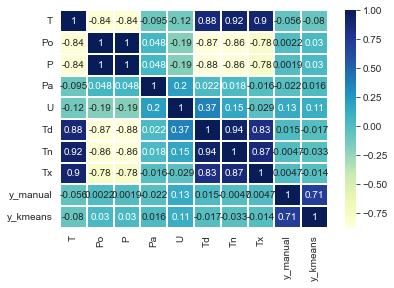

In [15]:
sns.heatmap(whole_corr, cmap = "YlGnBu", annot = True, linewidths = 0.05)

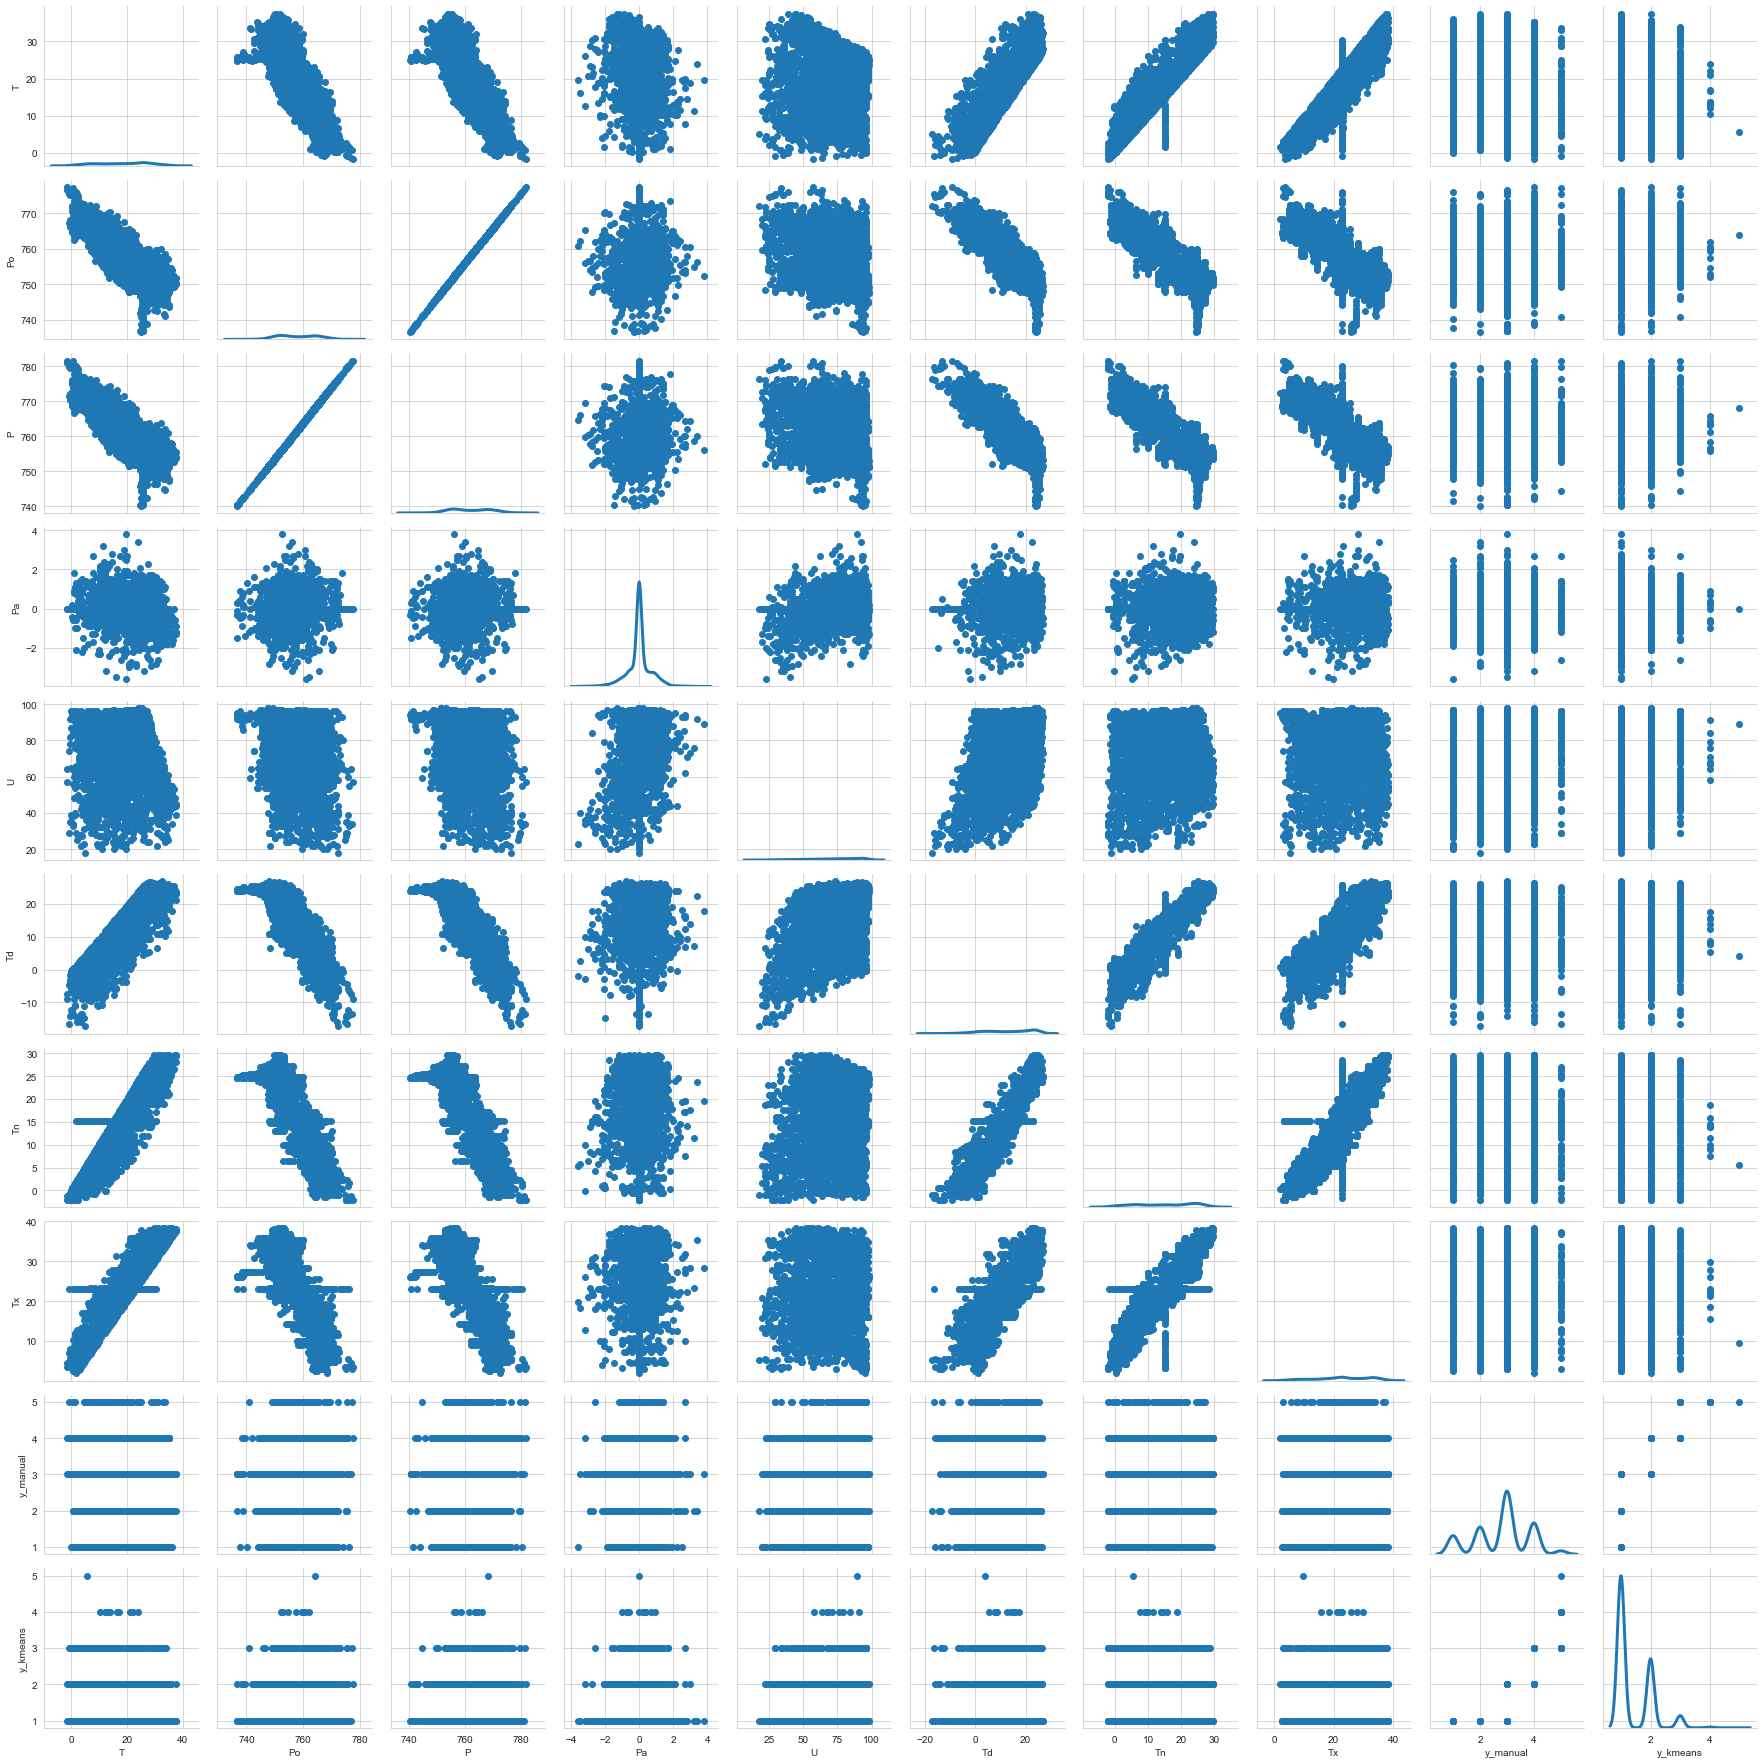

In [16]:
g = sns.PairGrid(whole_imp_df)
g.map_diag(sns.kdeplot, lw = 3)
g.map_offdiag(plt.scatter)
plt.show()

In [22]:
x_df = whole_imp_df[x_cols]
x_df

,T,Po,P,Pa,U,Td,Tn,Tx
0,12.0,756.5,760.4,0.0,95.0,11.2,11.0,13.000000
1,12.1,758.2,762.2,1.7,87.0,10.0,11.2,13.000000
2,12.1,758.8,762.8,0.6,83.0,9.3,11.3,13.000000
3,11.7,757.9,761.9,-0.9,78.0,8.0,11.5,13.000000
4,10.8,759.0,763.0,1.1,79.0,7.3,10.8,12.800000
...,...,...,...,...,...,...,...,...
2946,14.6,755.3,759.1,2.4,74.0,10.0,14.6,22.300000
2947,14.6,758.1,762.0,2.8,71.0,9.4,14.0,22.300000
2948,15.6,758.5,762.4,0.4,63.0,8.6,14.0,22.953145
2949,16.2,757.9,761.8,-0.6,62.0,8.9,14.0,22.953145


In [24]:
# we only apply data transformation to feature variables x
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler([0, 1])
x_mm_np = mm_scaler.fit_transform(x_df)
x_mm_df = pd.DataFrame(x_mm_np, columns = x_cols)
x_mm_df

,T,Po,P,Pa,U,Td,Tn,Tx
0,0.346154,0.488998,0.487923,0.486486,0.9625,0.644796,0.411950,0.305785
1,0.348718,0.530562,0.531401,0.716216,0.8625,0.617647,0.418239,0.305785
2,0.348718,0.545232,0.545894,0.567568,0.8125,0.601810,0.421384,0.305785
3,0.338462,0.523227,0.524155,0.364865,0.7500,0.572398,0.427673,0.305785
4,0.315385,0.550122,0.550725,0.635135,0.7625,0.556561,0.405660,0.300275
...,...,...,...,...,...,...,...,...
2946,0.412821,0.459658,0.456522,0.810811,0.7000,0.617647,0.525157,0.561983
2947,0.412821,0.528117,0.526570,0.864865,0.6625,0.604072,0.506289,0.561983
2948,0.438462,0.537897,0.536232,0.540541,0.5625,0.585973,0.506289,0.579976
2949,0.453846,0.523227,0.521739,0.405405,0.5500,0.592760,0.506289,0.579976


In [26]:
# axis = 1 adds more columns/features
whole_mm_df = pd.concat([x_mm_df, whole_df[["y_manual", "y_kmeans"]]], axis = 1)
whole_mm_df

,T,Po,P,Pa,U,Td,Tn,Tx,y_manual,y_kmeans
0,0.346154,0.488998,0.487923,0.486486,0.9625,0.644796,0.411950,0.305785,3.0,1.0
1,0.348718,0.530562,0.531401,0.716216,0.8625,0.617647,0.418239,0.305785,2.0,1.0
2,0.348718,0.545232,0.545894,0.567568,0.8125,0.601810,0.421384,0.305785,2.0,1.0
3,0.338462,0.523227,0.524155,0.364865,0.7500,0.572398,0.427673,0.305785,1.0,1.0
4,0.315385,0.550122,0.550725,0.635135,0.7625,0.556561,0.405660,0.300275,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
2946,0.412821,0.459658,0.456522,0.810811,0.7000,0.617647,0.525157,0.561983,2.0,1.0
2947,0.412821,0.528117,0.526570,0.864865,0.6625,0.604072,0.506289,0.561983,3.0,1.0
2948,0.438462,0.537897,0.536232,0.540541,0.5625,0.585973,0.506289,0.579976,3.0,1.0
2949,0.453846,0.523227,0.521739,0.405405,0.5500,0.592760,0.506289,0.579976,3.0,1.0


<AxesSubplot:>

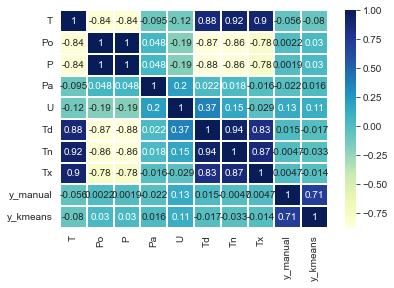

In [27]:
whole_mm_corr = whole_mm_df.corr()
sns.heatmap(whole_mm_corr, cmap="YlGnBu", annot = True, linewidths = 0.05)

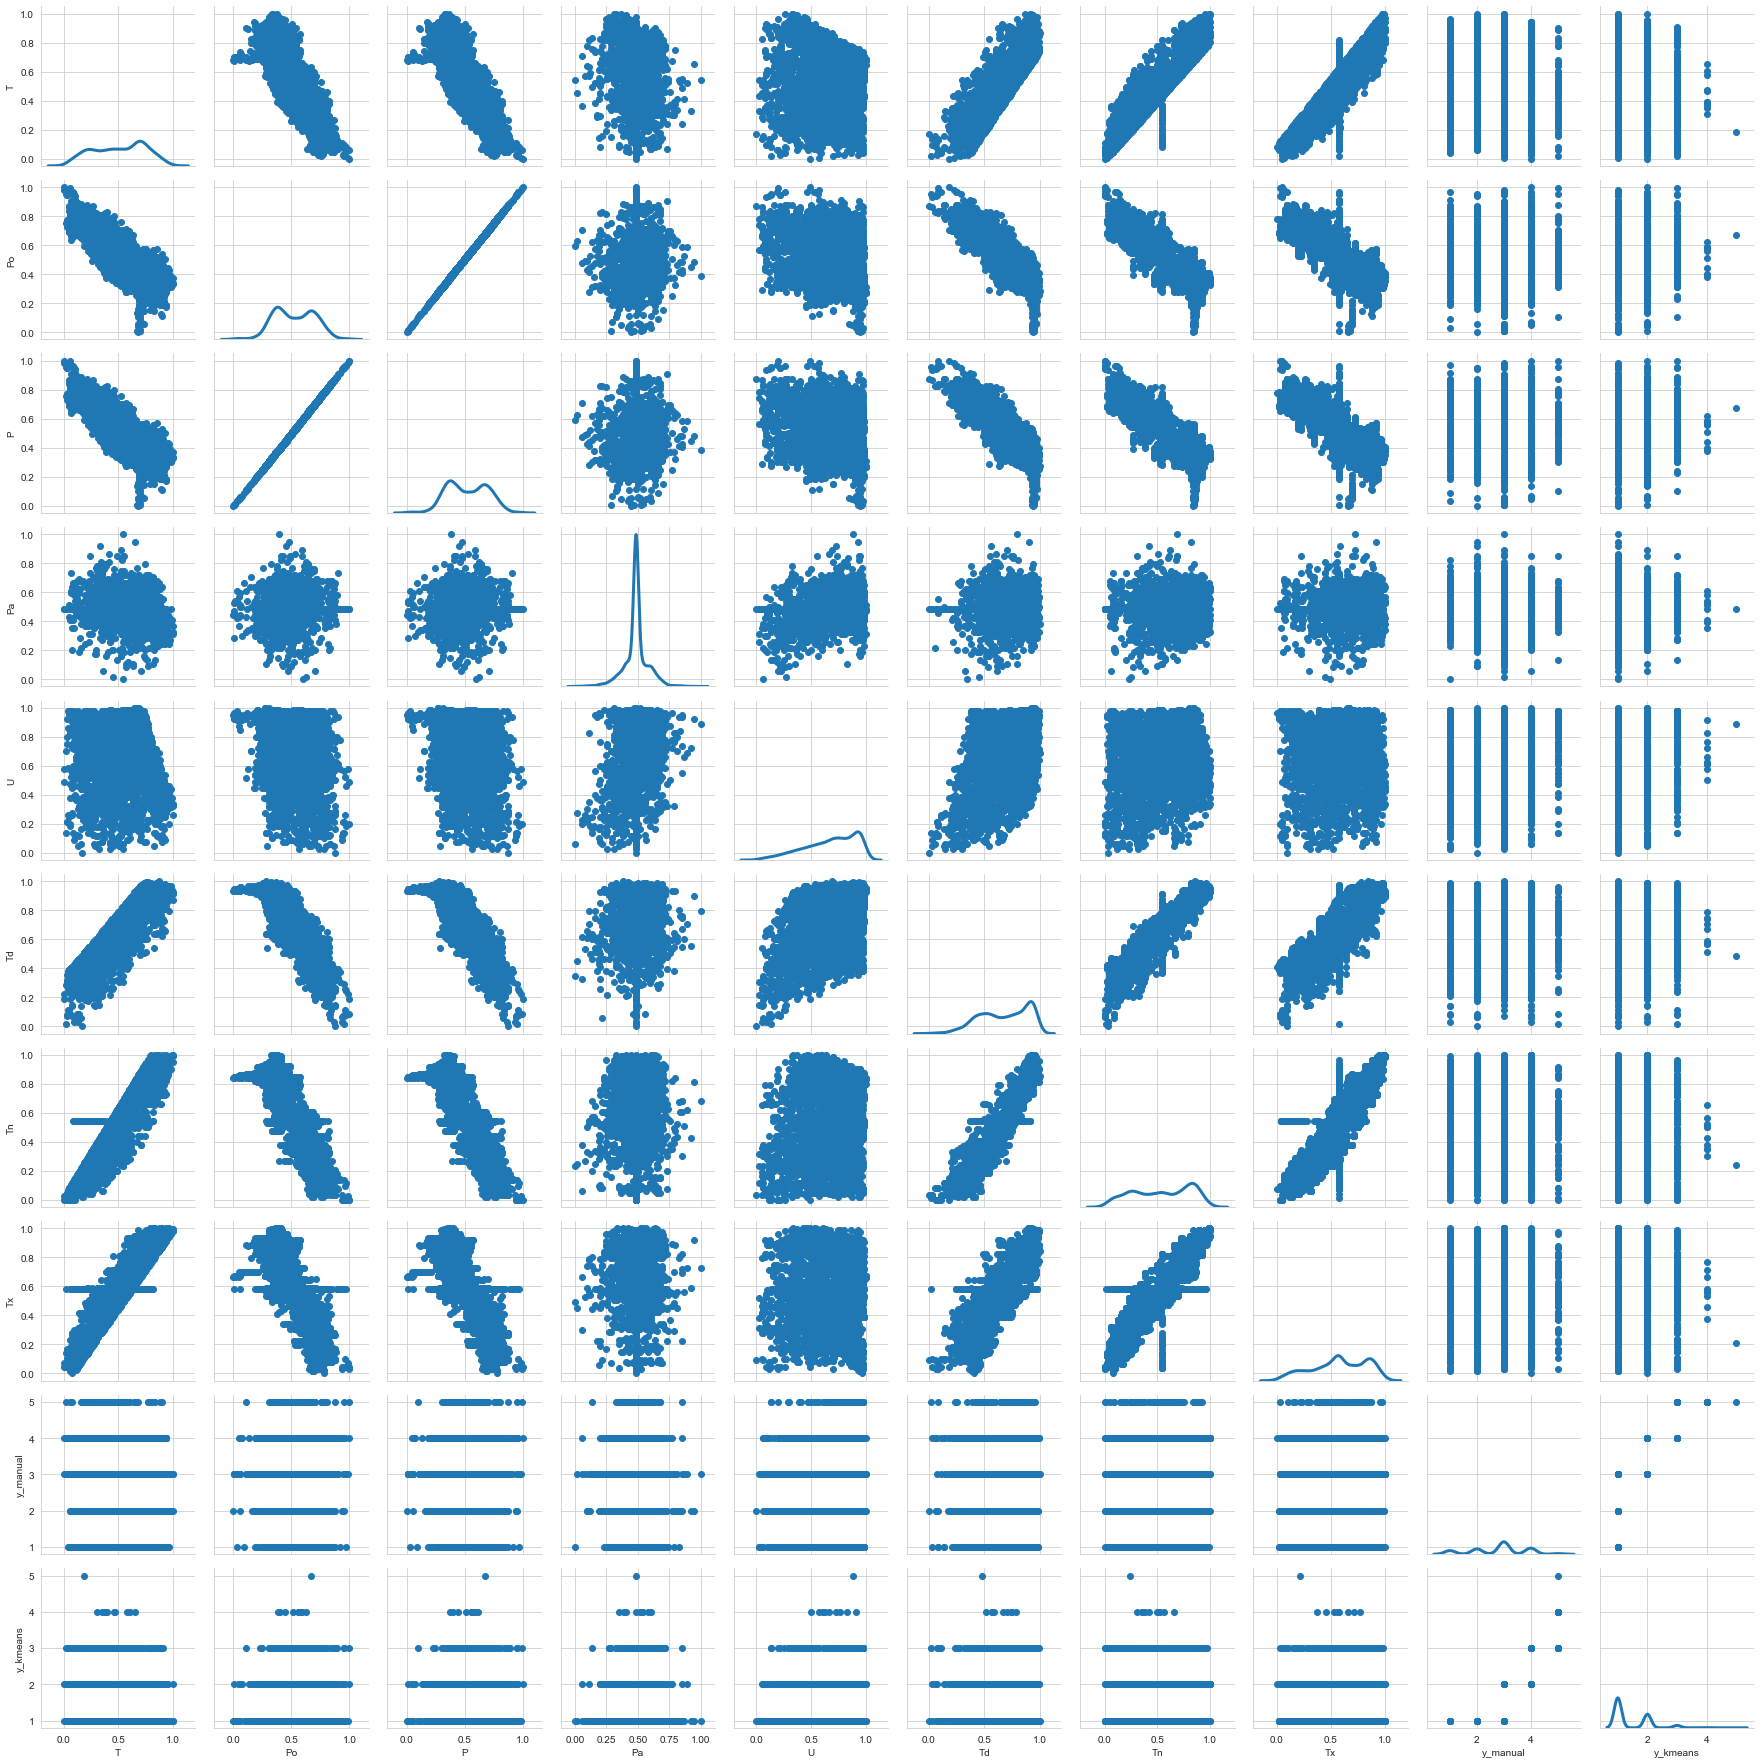

In [28]:
g_mm = sns.PairGrid(whole_mm_df)
g_mm.map_diag(sns.kdeplot, lw = 3)
g_mm.map_offdiag(plt.scatter)
plt.show()

In [29]:
n_total = x_mm_df.shape[0]
n_test = 240
n_train = n_total - n_test
n_total, n_train, n_test

(2951, 2711, 240)

In [39]:
x_train = x_mm_df[0:n_train] # n_train is not included
x_test = x_mm_df[n_train:n_total]
y_manual_train = whole_mm_df.loc[0:(n_train-1), "y_manual"] # n_train-1 is included
y_manual_test = whole_mm_df.loc[n_train:(n_total-1), "y_manual"]
y_kmeans_train = whole_mm_df.loc[0:(n_train-1), "y_kmeans"] # n_train-1 is included
y_kmeans_test = whole_mm_df.loc[n_train:(n_total-1), "y_kmeans"]
print(x_train.shape, y_manual_train.shape)
print(x_test.shape, y_manual_test.shape)
print(x_train.shape, y_kmeans_train.shape)
print(x_test.shape, y_kmeans_test.shape)

(2711, 8) (2711,)
(240, 8) (240,)
(2711, 8) (2711,)
(240, 8) (240,)


In [40]:
from sklearn.neural_network import MLPClassifier

In [68]:
clf_mlp = MLPClassifier(solver = "adam", max_iter = 300, random_state = 1,
                        beta_1 = 0.7, beta_2 = 0.1)
clf_mlp.fit(x_train, y_manual_train)
y_pred_manual_mlp = clf_mlp.predict(x_test)
clf_mlp.score(x_test, y_manual_test)

0.43333333333333335

Text(0, 0.5, 'fire level')

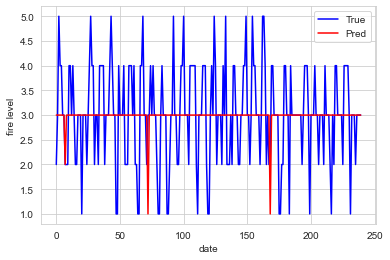

In [83]:
plt.plot(np.array(y_manual_test), color = "blue")
plt.plot(y_pred_manual_mlp, color = "red")
plt.legend(["True", "Pred"])
plt.xlabel("date")
plt.ylabel("fire level")

In [86]:
clf_mlp = MLPClassifier(solver = "adam", max_iter = 300, random_state = 1,
                        beta_1 = 0.7, beta_2 = 0.1)
clf_mlp.fit(x_train, y_kmeans_train)
y_pred_kmeans_mlp = clf_mlp.predict(x_test)
clf_mlp.score(x_test, y_kmeans_test)

0.6041666666666666

Text(0, 0.5, 'fire level')

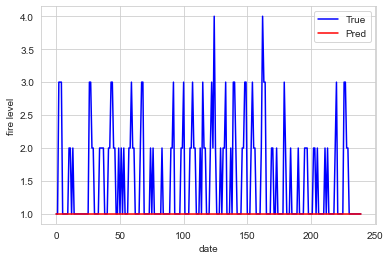

In [87]:
plt.plot(np.array(y_kmeans_test), color = "blue")
plt.plot(y_pred_kmeans_mlp, color = "red")
plt.legend(["True", "Pred"])
plt.xlabel("date")
plt.ylabel("fire level")

In [89]:
from sklearn.svm import SVC

In [102]:
clf_svc = SVC(C = 1, kernel = "sigmoid", random_state = 1)
clf_svc.fit(x_train, y_manual_train)
y_pred_manual_svc = clf_svc.predict(x_test)
clf_svc.score(x_test, y_manual_test)

0.43333333333333335

Text(0, 0.5, 'fire level')

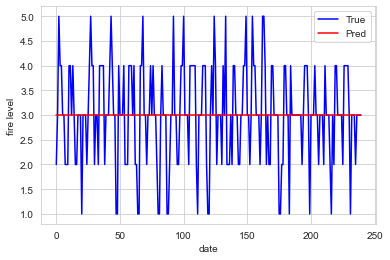

In [103]:
plt.plot(np.array(y_manual_test), color = "blue")
plt.plot(y_pred_manual_svc, color = "red")
plt.legend(["True", "Pred"])
plt.xlabel("date")
plt.ylabel("fire level")

In [104]:
clf_svc = SVC(C = 1, kernel = "sigmoid", random_state = 1)
clf_svc.fit(x_train, y_kmeans_train)
y_pred_kmeans_svc = clf_svc.predict(x_test)
clf_svc.score(x_test, y_kmeans_test)

0.6041666666666666

Text(0, 0.5, 'fire level')

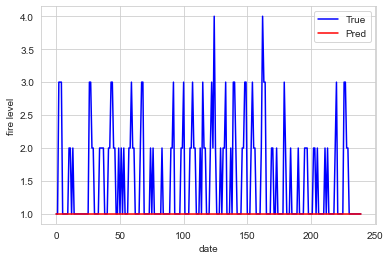

In [105]:
plt.plot(np.array(y_kmeans_test), color = "blue")
plt.plot(y_pred_kmeans_svc, color = "red")
plt.legend(["True", "Pred"])
plt.xlabel("date")
plt.ylabel("fire level")